# **CARGA DE ARCHIVO**

In [3]:
import pandas as pd
url = "https://raw.githubusercontent.com/EugeDi/TelecomX2_LATAM/main/datos_tratados.csv"
datos = pd.read_csv(url)
print(datos.head())

   Churn  SeniorCitizen  tenure  PhoneService  MultipleLines InternetService  \
0      0              0       9             1              0             dsl   
1      0              0       9             1              1             dsl   
2      1              0       4             1              0     fiber optic   
3      1              1      13             1              0     fiber optic   
4      1              1       3             1              0     fiber optic   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
0               0             1                 0            1            1   
1               0             0                 0            0            0   
2               0             0                 1            0            0   
3               0             1                 1            0            1   
4               0             0                 0            1            1   

   StreamingMovies        Contract  Paperles

In [4]:
datos['PaymentMethod'].unique()

array(['mailed check', 'electronic check', 'credit card (automatic)',
       'bank transfer (automatic)'], dtype=object)

# **ANÁLISIS EXPLORATORIO**

## 1. Lectura de datos

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   tenure            7032 non-null   int64  
 3   PhoneService      7032 non-null   int64  
 4   MultipleLines     7032 non-null   int64  
 5   InternetService   7032 non-null   object 
 6   OnlineSecurity    7032 non-null   int64  
 7   OnlineBackup      7032 non-null   int64  
 8   DeviceProtection  7032 non-null   int64  
 9   TechSupport       7032 non-null   int64  
 10  StreamingTV       7032 non-null   int64  
 11  StreamingMovies   7032 non-null   int64  
 12  Contract          7032 non-null   object 
 13  PaperlessBilling  7032 non-null   int64  
 14  PaymentMethod     7032 non-null   object 
 15  Monthly           7032 non-null   float64
 16  Total             7032 non-null   float64


## 2. Clasificación de variables



*   **Variables Categóricas**:
   - Nominales:
      - Binarias: 'Churn', 'SeniorCitizen', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
      - Más de 2 valores: 'InternetService', 'Contract', 'PaymentMethod'
   - Ordinales: //
*   **Variables Numéricas**:
   - Discretas: 'tenure'
   - Continuas: 'Monthly', 'Total', 'Cuentas_Diarias'


## 3. Análisis de Variables Categóricas y Verificación de la Proporción de Cancelación (Churn)

In [6]:
import plotly.express as px
from plotly.subplots import make_subplots
# Variables categóricas
binarias = ['Churn', 'SeniorCitizen', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies', 'PaperlessBilling']
multiclase = ['InternetService', 'Contract', 'PaymentMethod']
todas = binarias + multiclase
# Cantidad total de gráficos y cantidad de filas necesarias
n = len(todas)
filas = (n + 1) // 2
# Gráficos
graf = make_subplots(
    rows=filas, cols=2,
    subplot_titles=todas,
    horizontal_spacing=0.1, vertical_spacing=0.1
)
for i, var in enumerate(todas):
    row = i // 2 + 1
    col = i % 2 + 1
    hist = px.histogram(datos, x=var, color='Churn', barmode='group')
    for trace in hist.data:
        trace.showlegend = False
        graf.add_trace(trace, row=row, col=col)
    graf.update_xaxes(showticklabels=True, showgrid=False, tickvals=None, row=row, col=col)
graf.update_layout(
    height=300 * filas,
    title_text="Distribución de variables categóricas (según Churn)",
    showlegend=False
)
graf.show()

## 4. Análisis de Variables Numéricas

### Variables numéricas

In [7]:
import plotly.express as px
from plotly.subplots import make_subplots
# Variables numéricas
numericas = ['tenure', 'Monthly', 'Total', 'Cuentas_Diarias']
# Cantidad total de gráficos y cantidad de filas necesarias
n = len(numericas)
filas = (n + 1) // 2
# Gráficos
graf = make_subplots(
    rows=filas, cols=2,
    subplot_titles=numericas,
    horizontal_spacing=0.1, vertical_spacing=0.1
)
for i, var in enumerate(numericas):
    row = i // 2 + 1
    col = i % 2 + 1
    box = px.box(datos, x='Churn', y=var, color='Churn', points=False)
    for trace in box.data:
        trace.showlegend = (i == 0)  # solo la primera tiene leyenda
        graf.add_trace(trace, row=row, col=col)
    graf.update_xaxes(tickangle=0, row=row, col=col)
graf.update_layout(
    height=300 * filas,
    title_text="Distribución de variables numéricas según Churn",
    showlegend=True
)
graf.show()

# **PREPARACIÓN DE DATOS**

## 1. Separación Variables Explicativas (X) y Variable Respuesta (y)

In [8]:
X = datos.drop('Churn', axis = 1)
y = datos['Churn']

## 2. Transformación de Variables Explicativas

In [9]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
columnas = X.columns
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['InternetService', 'Contract', 'PaymentMethod']
),
    remainder = 'passthrough',
    sparse_threshold=0,
    force_int_remainder_cols=False)
X = one_hot.fit_transform(X)
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__InternetService_dsl',
       'onehotencoder__InternetService_fiber optic',
       'onehotencoder__InternetService_no',
       'onehotencoder__Contract_month-to-month',
       'onehotencoder__Contract_one year',
       'onehotencoder__Contract_two year',
       'onehotencoder__PaymentMethod_bank transfer (automatic)',
       'onehotencoder__PaymentMethod_credit card (automatic)',
       'onehotencoder__PaymentMethod_electronic check',
       'onehotencoder__PaymentMethod_mailed check',
       'remainder__SeniorCitizen', 'remainder__tenure',
       'remainder__PhoneService', 'remainder__MultipleLines',
       'remainder__OnlineSecurity', 'remainder__OnlineBackup',
       'remainder__DeviceProtection', 'remainder__TechSupport',
       'remainder__StreamingTV', 'remainder__StreamingMovies',
       'remainder__PaperlessBilling', 'remainder__Monthly',
       'remainder__Total', 'remainder__Cuentas_Diarias'], dtype=object)

In [10]:
pd.DataFrame(X, columns = one_hot.get_feature_names_out(columnas))

,onehotencoder__InternetService_dsl,onehotencoder__InternetService_fiber optic,onehotencoder__InternetService_no,onehotencoder__Contract_month-to-month,onehotencoder__Contract_one year,onehotencoder__Contract_two year,onehotencoder__PaymentMethod_bank transfer (automatic),onehotencoder__PaymentMethod_credit card (automatic),onehotencoder__PaymentMethod_electronic check,onehotencoder__PaymentMethod_mailed check,...,remainder__OnlineSecurity,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__PaperlessBilling,remainder__Monthly,remainder__Total,remainder__Cuentas_Diarias
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.60,593.30,2.19
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.90,542.40,2.00
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.90,280.85,2.46
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.00,1237.85,3.27
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,55.15,742.90,1.84
7028,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,85.10,1873.70,2.84
7029,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,50.30,92.75,1.68
7030,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,67.85,4627.65,2.26


## 3. Transformación de Variables Respuesta (no es necesario en este caso)

In [11]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)
# y

## 4. Separación de datos para Entrenamiento, Validación y Prueba

In [12]:
from sklearn.model_selection import train_test_split
# PRUEBA (temp)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=5
)
# ENTRENAMIENTO (train) Y VALIDACION (val)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.176, stratify=y_temp, random_state=5
)

## 5. Balanceo de Clases

In [13]:
from imblearn.over_sampling import SMOTE
# Solo en grupo de train
smote = SMOTE(random_state=5)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
print(pd.Series(y_train_bal).value_counts(normalize=True))

Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


# **MODELO DE BASE / DUMMY**

## Generación del Modelo de Referencia (Baseline)

In [14]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.7345971563981043

In [15]:
churn_porcentaje = datos['Churn'].value_counts(normalize=True) * 100
# Mostrar resultados
print("\nPorcentaje de Churn:")
print(churn_porcentaje)



Porcentaje de Churn:
Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64


*Modelo Dummy: El porcentaje de exactitud es similar al porcentaje de Churn negativo (de clientes que siguien siendo clientes), por lo cual podemos suponer que el modelo no refleja verdadera capacidad para predecir datos, sino simplemente la dominancia de la clase 0 - "no churn".*

# **CORRELACIÓN Y SELECCIÓN DE VARIABLES**

## 1. Análisis de Correlación

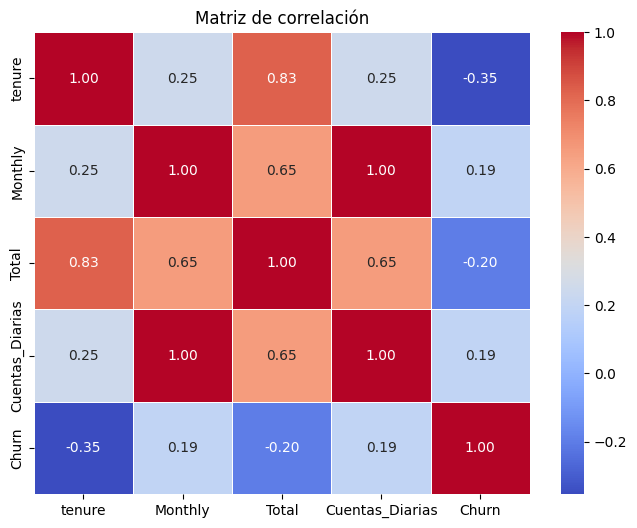

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_vars = ['tenure', 'Monthly', 'Total', 'Cuentas_Diarias', 'Churn']
correlacion_df = datos[corr_vars].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación")
plt.show()


*Podemos determinar que la correlación más significativa se da con la variable 'tenure' de forma inversamente proporcional: cuanto más tiempo estuvo el cliente, menos probable es que haya churn. Seguido por la variable 'Total', que también presenta una correlación negativa, aunque más débil. Esto sugiere que los clientes que han invertido más dinero a lo largo del tiempo tienden a permanecer en la empresa.*

## 2. Análisis Dirigido

In [17]:
import plotly.express as px

px.box(datos, x='Churn', y='tenure', color='Churn', points='outliers', width=800, height=600, title='Distribución de tenure según cancelación').show()
px.box(datos, x='Churn', y='Total', color='Churn', points='outliers', width=800, height=600, title='Distribución de Total según cancelación').show()

*Este análisis confirma la relación entre 'tenure' y 'Churn' y muestra cierto solapamiento y dispersión con respecto al 'Total' y 'Churn'.*

# **MODELADO PREDICTIVO**

## 1. Generación del Modelo de Árbol de Decisión

In [18]:
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier(max_depth=3, random_state=5)
arbol.fit(X_train, y_train)
arbol_val  = arbol.score(X_val,  y_val)
arbol_test = arbol.score(X_test, y_test)
print(f'Árbol: {arbol_test:.4f}')


Árbol: 0.7972


*Modelo de Árbol de Decisión: Superó al modelo baseline por más de 5 puntos, por lo que podemos inferir que hubo un aprendizaje para clasificar clientes que hacen churn.*

### Gráfico del Árbol de Decisión

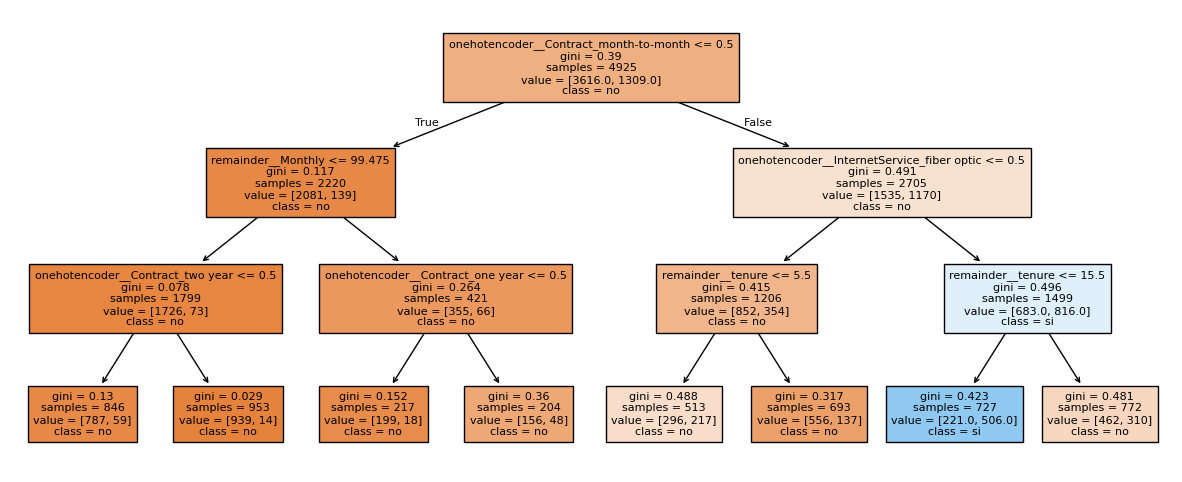

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
valores_columnas = [
    'onehotencoder__InternetService_dsl',
    'onehotencoder__InternetService_fiber optic',
    'onehotencoder__InternetService_no',
    'onehotencoder__Contract_month-to-month',
    'onehotencoder__Contract_one year',
    'onehotencoder__Contract_two year',
    'onehotencoder__PaymentMethod_bank transfer (automatic)',
    'onehotencoder__PaymentMethod_credit card (automatic)',
    'onehotencoder__PaymentMethod_electronic check',
    'onehotencoder__PaymentMethod_mailed check',
    'remainder__SeniorCitizen', 'remainder__tenure',
    'remainder__PhoneService', 'remainder__MultipleLines',
    'remainder__OnlineSecurity', 'remainder__OnlineBackup',
    'remainder__DeviceProtection', 'remainder__TechSupport',
    'remainder__StreamingTV', 'remainder__StreamingMovies',
    'remainder__PaperlessBilling', 'remainder__Monthly',
    'remainder__Total', 'remainder__Cuentas_Diarias'
]
plt.figure(figsize = (15, 6))
plot_tree(arbol, filled = True, class_names = ['no', 'si'], fontsize = 8, feature_names = valores_columnas);

*Si bien el análisis de la matriz de correlación arrojaba una correlación significativa entre el 'tenure' y el 'Churn', mediante la graficación del modelo de árbol de decisión, podemos observar que según este último modelo el nodo raíz correspondería al **tipo de contrato - mes a mes**. Dicha variable se podría explicar ya que los contratos mes a mes son más volátiles y podrían impactar en la no fidelización del cliente.*

## 2. Normalización de datos

*El modelo KNN, al basarse en calcular distancias entre observaciones, es sensible a las magnitudes numéricas. De esta forma, si no normalizáramos los datos - en este caso con MinMaxScaler -, las variables que tienen rangos más amplios tendrían más significatividad para el modelo que otras con menor rango.*

In [20]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)
X_val_norm = norm.transform(X_val)
X_test_norm = norm.transform(X_test)

## 3. Generación del Modelo KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_norm, y_train)
knn_val  = knn.score(X_val_norm,  y_val)
knn_test = knn.score(X_test_norm, y_test)
print(f'KNN: {knn_test:.4f}')


KNN: 0.7725


*Modelo KNN: Superó al modelo baseline aunque obtuvo menor puntaje de exactitud que el modelo de árbol de desiciones, por tanto podemos inferir que hubo un aprendizaje para clasificar clientes que hacen churn, pero no tan eficiente como el observado en el modelo de árbol de decisiones.*

## 4. Evaluación de Modelos

### 1) Cálculo de exactitud de cada modelo:

In [22]:
print(f'Exactitud Dummy: Test: {(dummy.score(X_test, y_test)):.4f}')
print(f'Exactitud Árbol: Validación: {arbol_val:.4f} | Test: {arbol_test:.4f}')
print(f'Exactitud KNN: Validación: {knn_val:.4f} | Test: {knn_test:.4f}')

Exactitud Dummy: Test: 0.7346
Exactitud Árbol: Validación: 0.7785 | Test: 0.7972
Exactitud KNN: Validación: 0.7643 | Test: 0.7725


### 2) Matrices de confusión de cada modelo:

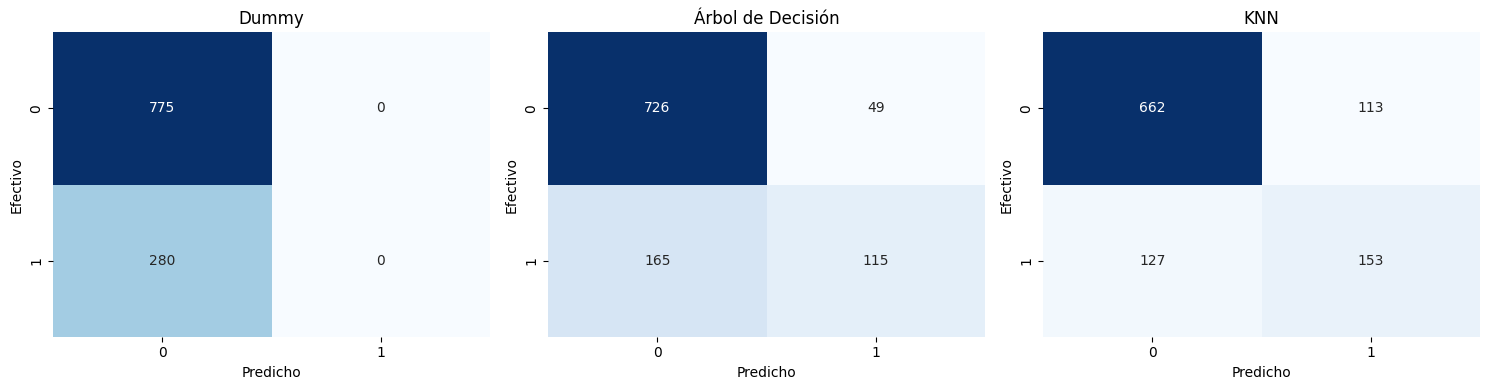

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
modelos = {
    "Dummy": dummy,
    "Árbol de Decisión": arbol,
    "KNN": knn
}
X_tests = {
    "Dummy": X_test,
    "Árbol de Decisión": X_test,
    "KNN": X_test_norm
}

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, (nombre, modelo) in enumerate(modelos.items()):
    y_pred = modelo.predict(X_tests[nombre])
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[i])
    axes[i].set_title(nombre)
    axes[i].set_xlabel('Predicho')
    axes[i].set_ylabel('Efectivo')
plt.tight_layout()
plt.show()

*Con el gráfico de **MATRIZ DE CONFUSIÓN** de cada modelo podemos observar que:*

* **El modelo Dummy**: *Sólo se guió por el valor más frecuente de churn ('0') y predijo para todos los casos el mismo valor. Por tanto, no hubo aprendizaje.*
* **El modelo Árbol**: *Demostró aprendizaje, al predecir el 41,07% de los casos en los cuales iba a darse la baja del cliente.*
* **El modelo KNN**: *Demostró aprendizaje, al predecir el 54,64% de los casos en los cuales iba a darse la baja del cliente; pero en esta predicción arrojó menor exactitud para los casos donde no hubo churn.*

### 3) Presición de cada modelo:

In [24]:
from sklearn.metrics import precision_score
print("Precisión Dummy:", precision_score(y_test, dummy.predict(X_test), zero_division=0))
print("Precisión Árbol:", precision_score(y_test, arbol.predict(X_test), zero_division=0))
print("Precisión KNN:", precision_score(y_test, knn.predict(X_test_norm), zero_division=0))

Precisión Dummy: 0.0
Precisión Árbol: 0.7012195121951219
Precisión KNN: 0.575187969924812


*Con el cálculo de **PRECISIÓN** de cada modelo podemos observar que:*

* **El modelo Dummy**: *Sólo se guió por el valor más frecuente de churn ('0'), por lo cual su precisión fue nula.*
* **El modelo Árbol**: *Demostró una precisión del 70,12%, indicando una buena capacidad para discriminar verdaderos casos de churn sin generar demasiados falsos positivos.*
* **El modelo KNN**: *Demostró una precisión del 57,51%, lo que indicaria un rendimiento menor con respecto al modelo de árbol, ya que incurre más seguido en la generación de falsos positivos de churn.*

### 4) Recall de cada modelo:

In [25]:
from sklearn.metrics import recall_score
print("Recall Dummy:", recall_score(y_test, dummy.predict(X_test)))
print("Recall Árbol:", recall_score(y_test, arbol.predict(X_test)))
print("Recall KNN:", recall_score(y_test, knn.predict(X_test_norm)))

Recall Dummy: 0.0
Recall Árbol: 0.4107142857142857
Recall KNN: 0.5464285714285714


*Con el cálculo de **RECALL** de cada modelo podemos observar que:*

* **El modelo Dummy**: *Confirma la nulidad de su precisión, no logrando identificar ningún caso real de cancelación.*
* **El modelo Árbol**: *Obtuvo un recall del 41,07%, indicando que aún requiere mejoras para poder detectar los casos que efectivamente se dieron de baja.*
* **El modelo KNN**: *Obtuvo un recall del 54,64%, lo que indicaria un mayor rendimiento con respecto al modelo de árbol, pero a costas de su menor precisión.*

### 5) F1-Score de cada modelo:

In [26]:
from sklearn.metrics import f1_score
print("F1-score Dummy:", f1_score(y_test, dummy.predict(X_test), zero_division=0))
print("F1-score Árbol:", f1_score(y_test, arbol.predict(X_test), zero_division=0))
print("F1-score KNN:", f1_score(y_test, knn.predict(X_test_norm), zero_division=0))

F1-score Dummy: 0.0
F1-score Árbol: 0.5180180180180181
F1-score KNN: 0.5604395604395604


*Con el cálculo de **F1-SCORE** de cada modelo podemos observar que:*

* **El modelo Dummy**: *Continúa arrojando nulo, de forma esperable para su underfitting.*
* **El modelo Árbol**: *Arrojó un valor de 0.518, indicando un moderado balance entre precisión y recall, aunque la capacidad de detección de todos los churn demostró ser limitada.*
* **El modelo KNN**: *Arrojó un valor de 0.560, demostrando un mayor equilibrio entre recall y precisión.*

### 6) Exportación de archivos binarios:

In [28]:
import pickle
with open('datos_transformados.pkl', 'wb') as archivo:
    pickle.dump(one_hot, archivo)
with open('modelo_arbol.pkl', 'wb') as archivo:
    pickle.dump(arbol, archivo)
with open('modelo_champion.pkl', 'wb') as archivo:
    pickle.dump(knn, archivo)

# **INTERPRETACIÓN Y CONCLUSIONES**

## 1. Análisis de la Importancia de las Variables

### 1) **Regresión Logística**

In [33]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_norm, y_train)
coeficientes = pd.Series(log_reg.coef_[0], index=one_hot.get_feature_names_out())
coeficientes.sort_values(key=np.abs, ascending=False).head(10)

,0
remainder__tenure,-2.830525
remainder__Total,1.018930
onehotencoder__InternetService_no,-0.874306
onehotencoder__Contract_two year,-0.780769
onehotencoder__Contract_month-to-month,0.684487
onehotencoder__InternetService_fiber optic,0.676260
remainder__PhoneService,-0.638885
remainder__TechSupport,-0.444992
remainder__OnlineSecurity,-0.419406
remainder__SeniorCitizen,0.335672


*Con la **REGRESIÓN LOGÍSTICA** podemos determinar que las variables más significativas son:*
* **tenure**: *cuanto más tiempo estuvo el cliente, menos probable es que haya churn.*
* **Total**: *cuanto mayor es el monto total facturado, mayor es la probabilidad de cancelación.*

*Este análisis de regresión logística corrige la multicolinealidad que había arrojado previamente el análisis de la matriz de correlación, demostrando que, una vez controladas las demás variables, a mayor total facturado, aumenta la probabilidad de churn.*

### 2) **Random Forest**

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=5)
rf.fit(X_train, y_train)
importancia_rf = pd.Series(rf.feature_importances_, index=one_hot.get_feature_names_out())
importancia_rf.sort_values(ascending=False).head(10)

,0
remainder__Total,0.179930
remainder__Monthly,0.155675
remainder__tenure,0.153984
remainder__Cuentas_Diarias,0.124954
onehotencoder__Contract_month-to-month,0.069671
onehotencoder__PaymentMethod_electronic check,0.030705
onehotencoder__Contract_two year,0.024933
onehotencoder__InternetService_fiber optic,0.024149
remainder__PaperlessBilling,0.022952
remainder__SeniorCitizen,0.021081


*Con el **RANDOM FOREST** podemos determinar que las variables más significativas son:*
* **Total**: *el monto total pagado es clave en la decisión de churn, coherente con lo visto en regresión logística.*
* **Monthly**: *el valor mensual también impactaría directamente.*
* **tenure**: *el tiempo de permanencia vuelve a ser una de las variables más relevantes, lo que refuerza su valor predictivo.*

### 3) **Support Vector Machine**

In [35]:
from sklearn.svm import LinearSVC
svm = LinearSVC(max_iter=5000)
svm.fit(X_train_norm, y_train)
coef_svm = pd.Series(svm.coef_[0], index=one_hot.get_feature_names_out())
coef_svm.sort_values(key=np.abs, ascending=False).head(10)

,0
remainder__tenure,-0.806870
onehotencoder__InternetService_no,-0.517611
onehotencoder__InternetService_fiber optic,0.478859
remainder__Monthly,-0.421092
remainder__Cuentas_Diarias,-0.318151
remainder__StreamingMovies,0.181600
remainder__MultipleLines,0.149002
remainder__SeniorCitizen,0.143499
remainder__StreamingTV,0.133883
onehotencoder__Contract_month-to-month,0.131503


*Con el **SVM** podemos determinar que las variables más significativas son:*
* **tenure**: *confirma que a mayor tiempo como cliente, menor probabilidad de baja.*
* **InternetService_no**: *no contar con internet predice menor churn.*
* **tenure**: *quienes tienen fibra óptica presentan más riesgo de cancelación.*

## 2. Conclusiones

Luego de aplicar distintos modelos de aprendizaje supervisado para predecir la cancelación de clientes (churn), podemos concluir lo siguiente:

### **Factores determinantes en la cancelación**

El análisis combinado de regresión logística, Random Forest y SVM reveló variables claves asociadas al churn:

* **Tenure** (tiempo como cliente): En todos los modelos, el tiempo de permanencia demostró tener una relación inversa con la cancelación. Cuanto mayor es el tiempo que el cliente lleva con la empresa, menor es la probabilidad de que se dé de baja. Esta variable se posicionó como **la más robusta y consistente en el análisis**.

* **Total facturado**: Esta variable apareció como significativa tanto en regresión logística como en Random Forest, aunque en sentidos distintos. La regresión sugiere que a mayor monto total abonado, mayor riesgo de churn (posiblemente por acumulación de costos o insatisfacción). El árbol y Random Forest, ubican su utilidad pero afectada por la multicolinealidad con tenure.

* **Tipo de contrato**: En especial los contratos "mes a mes" aumentan significativamente el riesgo de cancelación. Esto se evidenció tanto en el árbol de decisión (que usó esta variable como nodo raíz), como en los coeficientes de regresión y en la importancia en el Random Forest.

* **Servicio de Internet**: La ausencia de contratación de servicio de internet se asoció con una menor probabilidad de cancelación. Esto podría relacionarse con la variable de contratación del servicio de fibra óptica, la cual se asoció con mayor probabilidad de cancelación. Esto podría estar indicando expectativas de servicio de internet más altas a las cumplidas.

### **Recomendaciones para retención de clientes**

A partir de los resultados, pueden delinearse estrategias de retención centradas en variables clave:

* **Fidelización temprana**: Diseñar estrategias para retener a los clientes en sus primeros meses, ya que el riesgo de churn disminuye significativamente con el tiempo.

* **Revisar el esquema mes-a-mes**: Incentivar la migración a contratos más largos podría reducir la volatilidad del cliente.

* **Monitorear la satisfacción con respecto al servicio de internet**: Y en particular al brindado por fibra óptica. Su asociación con mayor churn podría estar indicando un desajuste entre promesa y percepción.